<a href="https://colab.research.google.com/github/tiffhugh/DATA71200/blob/main/class3/data71200class3lab-WorkingCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# In-Class Activity 1

In [2]:
# Import the California Housing Data from used in the HOML book, Chapter 2
# Apply one-hot encoding to the ocean_proximity value

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing['ocean_proximity'].values.reshape(-1,1)


In [6]:
print("Original features:\n", list(housing.columns), "\n")
data_dummies = pd.get_dummies(housing)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'] 

Features after get_dummies:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [7]:
display(data_dummies.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [19]:
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(housing))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# In-Class Activity 2

In [44]:
# Apply binning to the housing_median_age value in the California Housing dataset that we looked at last class
# Plot both the original data and the binned data using matplotlib

from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')


In [45]:
binned_age = binner.fit_transform(housing['housing_median_age'].values.reshape(-1, 1))
housing['binned_housing_median_age'] = binned_age
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [46]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

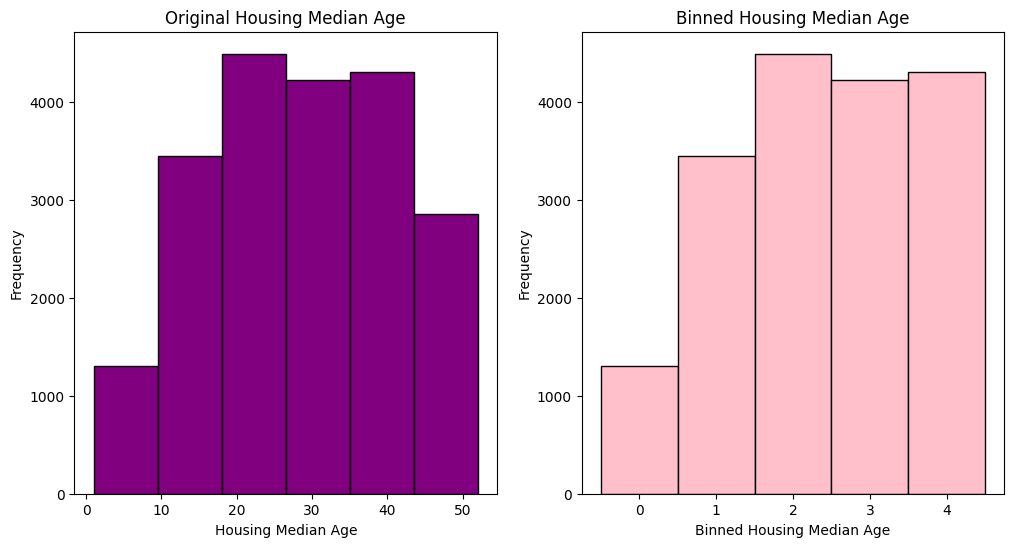

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Original data histogram
ax[0].hist(housing['housing_median_age'], bins=6, color='purple', edgecolor='black')
ax[0].set_title('Original Housing Median Age')
ax[0].set_xlabel('Housing Median Age')
ax[0].set_ylabel('Frequency')

# Binned data histogram
ax[1].hist(housing['binned_housing_median_age'], bins=np.arange(-0.5, 5.5, 1), color='pink', edgecolor='black')
ax[1].set_title('Binned Housing Median Age')
ax[1].set_xlabel('Binned Housing Median Age')
ax[1].set_ylabel('Frequency')

# In-Class Activity 3

In [ ]:
#Apply the following transformations to housing_median_age and median_income in the California Housing dataset
# Squaring (**2)
# Cubing (**3)
# np.log
# np.exp
# Plot histograms and scatter matrices to explore the resultant data

# housing_median_age


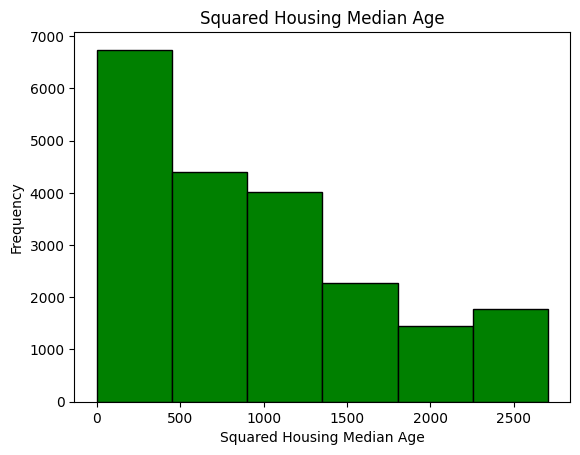

In [65]:
housing['squared_housing_median_age'] = housing['housing_median_age'] ** 2
nbins=6
plt.hist(housing['squared_housing_median_age'], bins=nbins, color='green', edgecolor='black')
plt.title('Squared Housing Median Age')
plt.xlabel('Squared Housing Median Age')
plt.ylabel('Frequency')
plt.show()


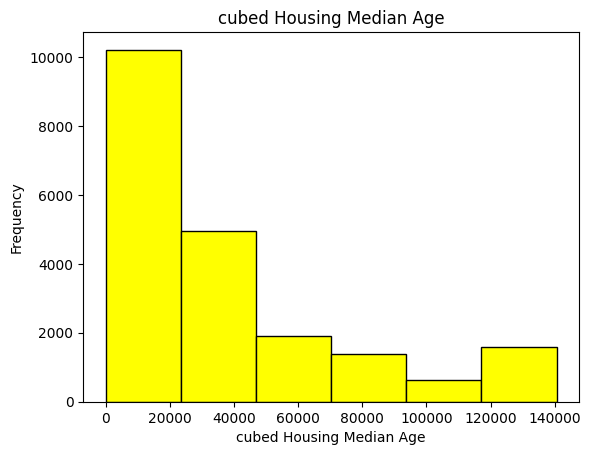

In [66]:
housing['cubed_housing_median_age'] = housing['housing_median_age'] ** 3
nbins=6
plt.hist(housing['cubed_housing_median_age'], bins=nbins, color='yellow', edgecolor='black')
plt.title('cubed Housing Median Age')
plt.xlabel('cubed Housing Median Age')
plt.ylabel('Frequency')
plt.show()


In [61]:
import numpy as np

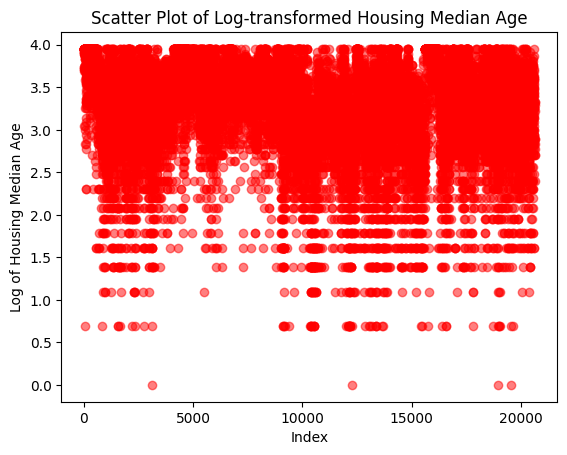

In [68]:
log_housing_median_age = np.log(housing['housing_median_age'])
plt.scatter(range(len(log_housing_median_age)), log_housing_median_age, color='red', alpha=0.5)
plt.title('Scatter Plot of Log-transformed Housing Median Age')
plt.xlabel('Index')
plt.ylabel('Log of Housing Median Age')
plt.show()

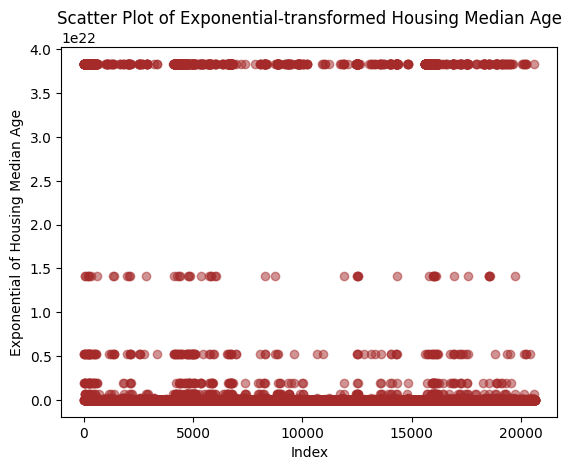

In [69]:
exp_housing_median_age = np.exp(housing['housing_median_age'])
plt.scatter(range(len(exp_housing_median_age)), exp_housing_median_age, color='brown', alpha=0.5)
plt.title('Scatter Plot of Exponential-transformed Housing Median Age')
plt.xlabel('Index')
plt.ylabel('Exponential of Housing Median Age')
plt.show()

In [ ]:
# median_income


In [ ]:
#scatter matrix for the original data for house_median_age and median_income



In [ ]:
#scatter matrix for the squared data for house_median_age and median_income


In [ ]:
#scatter matrix for the cubed data for house_median_age and median_income
